<a href="https://colab.research.google.com/github/zmarshall4497/dsba/blob/main/Assgn1_ZachMarshall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import data set
import pandas as pd
from google.colab import files 
import io

upload = files.upload()

dfZM = pd.read_csv(io.BytesIO(upload['Assignment 1 Dataset.csv']))

Saving Assignment 1 Dataset.csv to Assignment 1 Dataset.csv


In [3]:
#Examining the DF / deleting out irrelevant columns from the question
drop_cols = ['ACADEMIC_INTEREST_1','ACADEMIC_INTEREST_2','CONTACT_DATE','CONTACT_CODE1']
dfZM = dfZM.drop(drop_cols, axis=1)
dfZM.head()
dfZM.describe()
dfZM.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91482 entries, 0 to 91481
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ETHNICITY           71772 non-null  object 
 1   TERRITORY           91481 non-null  object 
 2   Enroll              91482 non-null  int64  
 3   TOTAL_CONTACTS      91482 non-null  int64  
 4   SELF_INIT_CNTCTS    91482 non-null  int64  
 5   TRAVEL_INIT_CNTCTS  91482 non-null  int64  
 6   SOLICITED_CNTCTS    91482 non-null  int64  
 7   REFERRAL_CNTCTS     91482 non-null  int64  
 8   CAMPUS_VISIT        91482 non-null  int64  
 9   LEVEL_YEAR          91482 non-null  object 
 10  IRSCHOOL            76172 non-null  object 
 11  satscore            27003 non-null  float64
 12  sex                 87649 non-null  float64
 13  mailq               91482 non-null  int64  
 14  telecq              20602 non-null  float64
 15  premiere            91482 non-null  int64  
 16  inte

In [4]:
#1.c - Should any other variables be rejected from the model for your analysis?
  #No, all other variables are relevant after the nominal variables have been replaced by interval variables and the other two were rejected per the question. The remaining variables all have some connection to the Target Variable, Enroll, which can help us build a better prediction.

In [5]:
#1.d - Which is your Target Variable?
  #Enroll, this is a binary variable that tells us the measure of success for whether or not a student will enroll, which is what will be used for the accuracy of our predictions.

In [6]:
#1.e - Do we need to make any changes of any measurement levels of our existing variables? Why / Why not?
print(dfZM.dtypes)
print(dfZM['Enroll'].dtypes)
  #based off of this, none of the variables in the dataset need to be changed, as they are all either binary, numeric or factor and our target variable is Binary.

ETHNICITY              object
TERRITORY              object
Enroll                  int64
TOTAL_CONTACTS          int64
SELF_INIT_CNTCTS        int64
TRAVEL_INIT_CNTCTS      int64
SOLICITED_CNTCTS        int64
REFERRAL_CNTCTS         int64
CAMPUS_VISIT            int64
LEVEL_YEAR             object
IRSCHOOL               object
satscore              float64
sex                   float64
mailq                   int64
telecq                float64
premiere                int64
interest                int64
stucell                 int64
init_span               int64
int1rat               float64
int2rat               float64
hscrat                float64
avg_income            float64
distance              float64
Instate                object
dtype: object
int64


In [7]:
#2 - Explain whether variable imputation and transformation are needed for the regression model. If so, please explain which variables have been imputed, transformed and how.
  #Transofrmation is needed for this, for the imputation we can use pandas to fill in the missing values by using the fillna() function, we can also use pandas to transform the categorical data into numerical data using the get_dummies() function to do this

dfZM.isnull().sum()/len(dfZM)


ETHNICITY             0.215452
TERRITORY             0.000011
Enroll                0.000000
TOTAL_CONTACTS        0.000000
SELF_INIT_CNTCTS      0.000000
TRAVEL_INIT_CNTCTS    0.000000
SOLICITED_CNTCTS      0.000000
REFERRAL_CNTCTS       0.000000
CAMPUS_VISIT          0.000000
LEVEL_YEAR            0.000000
IRSCHOOL              0.167355
satscore              0.704827
sex                   0.041899
mailq                 0.000000
telecq                0.774797
premiere              0.000000
interest              0.000000
stucell               0.000000
init_span             0.000000
int1rat               0.000000
int2rat               0.000000
hscrat                0.000000
avg_income            0.228777
distance              0.212807
Instate               0.000000
dtype: float64

In [8]:
#Fill Null Values for Numerical Data
null_num=['satscore','sex','telecq','avg_income','distance']
dfZM[null_num]=dfZM[null_num].fillna(dfZM[null_num].mean())

In [9]:
#We must transform all null categorical data by using get_dummies
dfZM_dummy=pd.get_dummies(dfZM,columns=['ETHNICITY','TERRITORY','IRSCHOOL'])

In [12]:
#REVIEWING DATA
dfZM.describe(include='all')

,ETHNICITY,TERRITORY,Enroll,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,REFERRAL_CNTCTS,CAMPUS_VISIT,LEVEL_YEAR,...,premiere,interest,stucell,init_span,int1rat,int2rat,hscrat,avg_income,distance,Instate
count,71772,91481,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482,...,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482
unique,7,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,C,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FR14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
freq,31750,14621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91482,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56760
mean,NaN,NaN,0.031350,2.166098,1.214119,0.364815,0.547222,0.039899,0.034673,NaN,...,0.028913,0.053639,0.489922,19.686157,0.037091,0.042896,0.037652,47315.334146,380.427645,NaN
std,NaN,NaN,0.174264,1.852537,1.666529,0.557067,0.649426,0.226191,0.187322,NaN,...,0.167562,0.242052,0.499901,8.722109,0.024026,0.025244,0.057399,18098.549708,353.101833,NaN
min,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,-216.000000,0.000000,0.000000,0.000000,4940.000000,0.417124,NaN
25%,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,13.000000,0.017183,0.020380,0.000000,34780.000000,146.790013,NaN
50%,NaN,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,19.000000,0.042105,0.056670,0.033333,47315.334146,329.522736,NaN
75%,NaN,NaN,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,1.000000,25.000000,0.049270,0.056670,0.048035,52028.000000,380.427645,NaN


In [18]:
#3 - Please provide the following results for each model:a. Model result summary for the regression model b. Tree plot for the decision tree model

#Setting Variables
X = dfZM.drop('Enroll', axis=1)
Y = dfZM['Enroll']

#Testing Skewness
X.skew(skipna=True)

<ipython-input-18-4a08f92a0347>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.skew(skipna=True)


TOTAL_CONTACTS        3.062389
SELF_INIT_CNTCTS      2.916263
TRAVEL_INIT_CNTCTS    1.418514
SOLICITED_CNTCTS      1.201013
REFERRAL_CNTCTS       7.572001
CAMPUS_VISIT          5.452054
satscore             -0.297848
sex                  -0.557497
mailq                -1.105478
telecq                0.411673
premiere              5.622951
interest              4.817932
stucell               0.040323
init_span             0.758461
int1rat               3.496845
int2rat               3.215683
hscrat                7.021978
avg_income            1.432743
distance              2.565859
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc35e78ee0>,
      dtype=object)

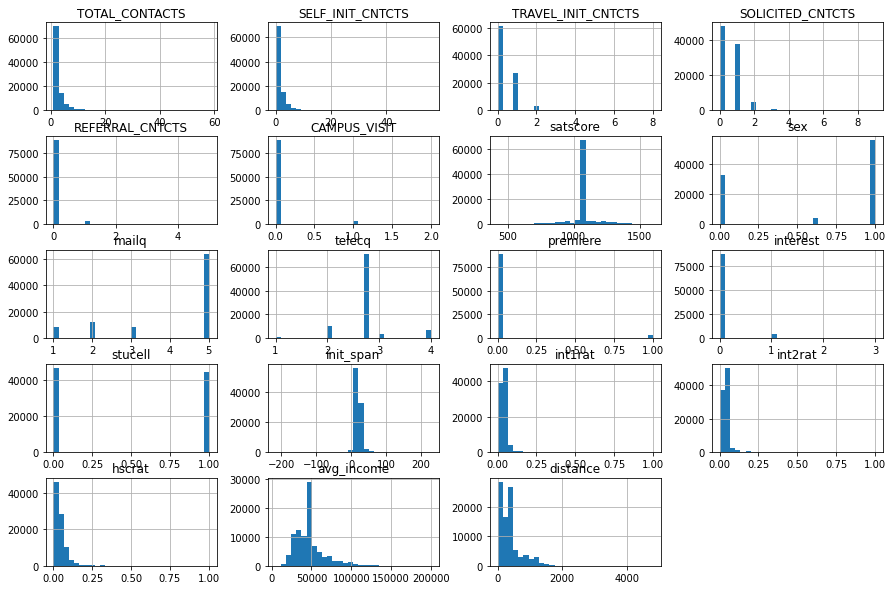

In [19]:
X.hist(bins=30, figsize=(15,10))

In [21]:
#Check Correlation of Variables

X.corr()

,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,REFERRAL_CNTCTS,CAMPUS_VISIT,satscore,sex,mailq,telecq,premiere,interest,stucell,init_span,int1rat,int2rat,hscrat,avg_income,distance
TOTAL_CONTACTS,1.000000,0.923753,0.229491,0.245085,0.115090,0.298847,0.259748,0.040970,-0.204294,-0.240154,0.490954,0.287364,0.361508,0.085316,0.195777,0.182284,0.195487,0.134903,-0.122029
SELF_INIT_CNTCTS,0.923753,1.000000,0.059156,0.005808,0.035479,0.339545,0.215307,0.014387,-0.114783,-0.247151,0.506723,0.283894,0.320280,-0.041523,0.198880,0.187631,0.231151,0.166145,-0.117030
TRAVEL_INIT_CNTCTS,0.229491,0.059156,1.000000,-0.339020,-0.045769,0.002808,0.011779,0.025281,-0.706166,-0.051185,0.061138,0.105864,0.033419,0.116978,0.160831,0.179017,-0.026865,-0.046238,-0.134575
SOLICITED_CNTCTS,0.245085,0.005808,-0.339020,1.000000,-0.071764,-0.026848,0.168909,0.059632,0.305246,0.001160,0.028990,-0.008986,0.196707,0.234382,-0.097115,-0.122263,-0.020868,-0.000035,0.073892
REFERRAL_CNTCTS,0.115090,0.035479,-0.045769,-0.071764,1.000000,0.016109,0.027144,-0.003765,0.035366,-0.023471,0.053780,0.026997,-0.046134,0.043565,0.020859,0.020617,0.024086,-0.005157,-0.017801
CAMPUS_VISIT,0.298847,0.339545,0.002808,-0.026848,0.016109,1.000000,0.140541,0.007384,-0.145760,-0.091714,0.081942,0.116651,0.111127,0.043017,0.074249,0.070314,0.128343,0.111510,-0.052923
satscore,0.259748,0.215307,0.011779,0.168909,0.027144,0.140541,1.000000,-0.031078,-0.004164,-0.043967,0.144733,0.088714,0.143148,0.089893,0.004702,-0.008866,0.135229,0.178140,0.022459
sex,0.040970,0.014387,0.025281,0.059632,-0.003765,0.007384,-0.031078,1.000000,-0.024876,0.006842,0.013733,0.003147,0.059356,0.070589,0.004405,-0.020797,-0.020950,-0.018846,0.020088
mailq,-0.204294,-0.114783,-0.706166,0.305246,0.035366,-0.145760,-0.004164,-0.024876,1.000000,0.059112,-0.054767,-0.155676,-0.057595,-0.074792,-0.165121,-0.175092,0.003186,0.033411,0.139188
telecq,-0.240154,-0.247151,-0.051185,0.001160,-0.023471,-0.091714,-0.043967,0.006842,0.059112,1.000000,-0.167057,-0.105213,-0.067542,0.018088,-0.056287,-0.057418,-0.078420,-0.037193,0.034634


In [23]:
dfZM.corr()

,Enroll,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,REFERRAL_CNTCTS,CAMPUS_VISIT,satscore,sex,mailq,telecq,premiere,interest,stucell,init_span,int1rat,int2rat,hscrat,avg_income,distance
Enroll,1.000000,0.451789,0.471775,0.052103,0.016668,0.048135,0.235264,0.183062,-0.009326,-0.050650,-0.209877,0.399842,0.181966,0.183567,-0.024459,0.125830,0.123740,0.329381,0.104419,-0.054604
TOTAL_CONTACTS,0.451789,1.000000,0.923753,0.229491,0.245085,0.115090,0.298847,0.259748,0.040970,-0.204294,-0.240154,0.490954,0.287364,0.361508,0.085316,0.195777,0.182284,0.195487,0.134903,-0.122029
SELF_INIT_CNTCTS,0.471775,0.923753,1.000000,0.059156,0.005808,0.035479,0.339545,0.215307,0.014387,-0.114783,-0.247151,0.506723,0.283894,0.320280,-0.041523,0.198880,0.187631,0.231151,0.166145,-0.117030
TRAVEL_INIT_CNTCTS,0.052103,0.229491,0.059156,1.000000,-0.339020,-0.045769,0.002808,0.011779,0.025281,-0.706166,-0.051185,0.061138,0.105864,0.033419,0.116978,0.160831,0.179017,-0.026865,-0.046238,-0.134575
SOLICITED_CNTCTS,0.016668,0.245085,0.005808,-0.339020,1.000000,-0.071764,-0.026848,0.168909,0.059632,0.305246,0.001160,0.028990,-0.008986,0.196707,0.234382,-0.097115,-0.122263,-0.020868,-0.000035,0.073892
REFERRAL_CNTCTS,0.048135,0.115090,0.035479,-0.045769,-0.071764,1.000000,0.016109,0.027144,-0.003765,0.035366,-0.023471,0.053780,0.026997,-0.046134,0.043565,0.020859,0.020617,0.024086,-0.005157,-0.017801
CAMPUS_VISIT,0.235264,0.298847,0.339545,0.002808,-0.026848,0.016109,1.000000,0.140541,0.007384,-0.145760,-0.091714,0.081942,0.116651,0.111127,0.043017,0.074249,0.070314,0.128343,0.111510,-0.052923
satscore,0.183062,0.259748,0.215307,0.011779,0.168909,0.027144,0.140541,1.000000,-0.031078,-0.004164,-0.043967,0.144733,0.088714,0.143148,0.089893,0.004702,-0.008866,0.135229,0.178140,0.022459
sex,-0.009326,0.040970,0.014387,0.025281,0.059632,-0.003765,0.007384,-0.031078,1.000000,-0.024876,0.006842,0.013733,0.003147,0.059356,0.070589,0.004405,-0.020797,-0.020950,-0.018846,0.020088
mailq,-0.050650,-0.204294,-0.114783,-0.706166,0.305246,0.035366,-0.145760,-0.004164,-0.024876,1.000000,0.059112,-0.054767,-0.155676,-0.057595,-0.074792,-0.165121,-0.175092,0.003186,0.033411,0.139188


In [26]:
#creating the regression
from sklearn.model_selection import train_test_split
x_trainZM, x_valZM,y_trainZM,y_valZM = train_test_split(X,Y,test_size=0.3,random_state=0)

In [28]:
#Log Regression
import statsmodels.api as sm
log_regZM = sm.Logit(y_trainZM,x_trainZM).fit()

ValueError: ignored